## Xcompare Difference Map Examples

In [1]:
%matplotlib inline

import xcompare
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings

from xcompare import plot_three_panel

### Load example datasets

The first example compares two different atmospheric model resolutions for 2-m surface air temperature.  The second example compares two different ocean model resolutions for sea surface temperature.

In [2]:
ds1 = xr.open_mfdataset(["ESM2G.atmos.nc","ESM2G.atmos.static.nc"])
ds2 = xr.open_mfdataset(["ESM4.atmos.nc","ESM4.atmos.static.nc"])
atm_results = xcompare.compare_datasets(ds1,ds2,varlist=["t_ref"])
atm_varname = "t_ref"

In [3]:
ds1 = xr.open_mfdataset(["ocean_annual_z.1995-1999.ann.nc","CM4.static.nc"])
ds2 = xr.open_mfdataset(["ocean_annual_z.2000-2004.ann.nc","ESM4.static.nc"])
%time ocn_results = xcompare.compare_datasets(ds1.isel(z_l=0),ds2.isel(z_l=0),varlist=["thetao"])
ocn_varname = "thetao"

CPU times: user 31.6 s, sys: 1.92 s, total: 33.6 s
Wall time: 34.2 s


### Plot Global Bias for lat-lon grid

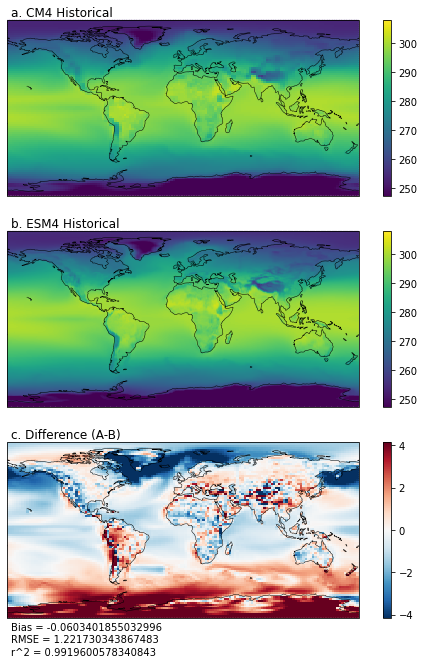

In [4]:
labels = ["CM4 Historical", "ESM4 Historical"]
fig = plot_three_panel(
    atm_results,
    atm_varname,
    labels=labels,
)

### Plot global bias for tripolar grid

/Users/krasting/miniconda3/envs/py39/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


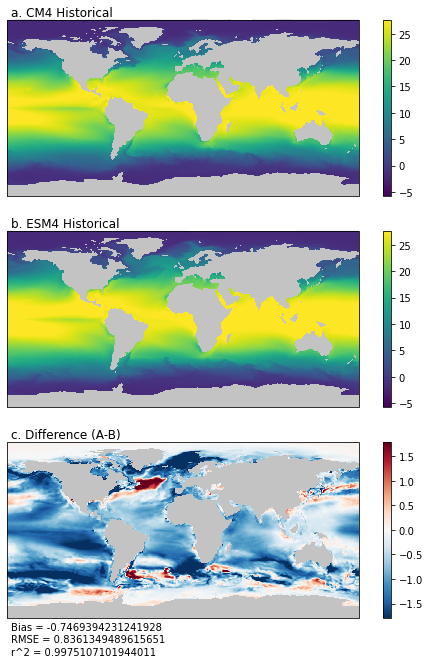

In [5]:
fig = plot_three_panel(
    ocn_results,
    ocn_varname,
    coastlines=False,
    labels=labels,
)

### Plot United States temperature bias

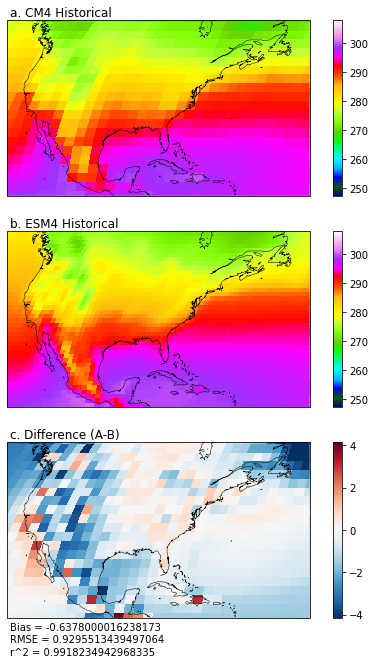

In [6]:
fig = plot_three_panel(
    atm_results,
    atm_varname,
    labels=labels,
    lon_range=(240,310),
    lat_range=(15,55),
    projection=ccrs.Robinson(),
    cmap="gist_ncar"
)

### Plot Atlantic SST bias

/Users/krasting/miniconda3/envs/py39/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


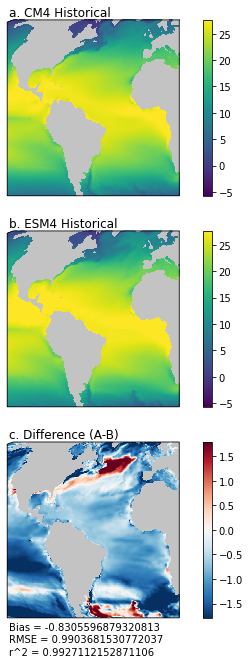

In [7]:
fig = plot_three_panel(
    ocn_results,
    ocn_varname,
    coastlines=False,
    labels=labels,
    lon_range=(-110,20),
    lat_range=(-50,65),
    projection=ccrs.Mollweide()
)

### Plot North Polar Stereographic View

/Users/krasting/miniconda3/envs/py39/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


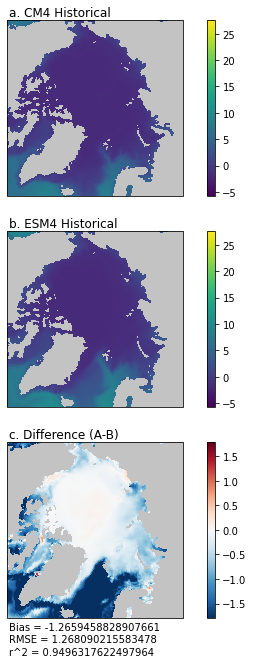

In [8]:
fig = plot_three_panel(
    ocn_results,
    ocn_varname,
    coastlines=False,
    labels=labels,
    projection=ccrs.NorthPolarStereo(),
    lon_range=(0.,359.),
    lat_range=(65.,90.)
)